In [ ]:
from tssb.utils import load_time_series_segmentation_datasets
from tssb.evaluation import covering
from claspy.segmentation import BinaryClaSPSegmentation
from claspy.data_loader import load_tssb_dataset
import matplotlib.pyplot as plt
from tssb.utils import visualize_time_series
import pandas as pd
import csv

tssb = load_time_series_segmentation_datasets()
tssb = load_time_series_segmentation_datasets(names=["Data\Adiac.txt", "InlineSkate", "Plane"])


In [ ]:
tssb = load_time_series_segmentation_datasets(names=["ArrowHead", "InlineSkate", "Plane"])
clasp = BinaryClaSPSegmentation()
for _, (ts_name, window_size, cps, ts) in tssb.iterrows():
    found_cps = clasp.fit_predict(ts)
    score = covering({0: cps}, found_cps, ts.shape[0])
    print(f"Time Series: {ts_name}: True Change Points: {cps}, Found Change Points: {found_cps.tolist()}, Score: {score}")
    clasp.plot(gt_cps=true_cps, heading=f"Segmentation of {ts_name}", ts_name="ACC", file_path="segmentation_example.png") 

Time Series: ChlorineConcentration: True Change Points: [2365], Found Change Points: [], Score: 0.5774870418254516


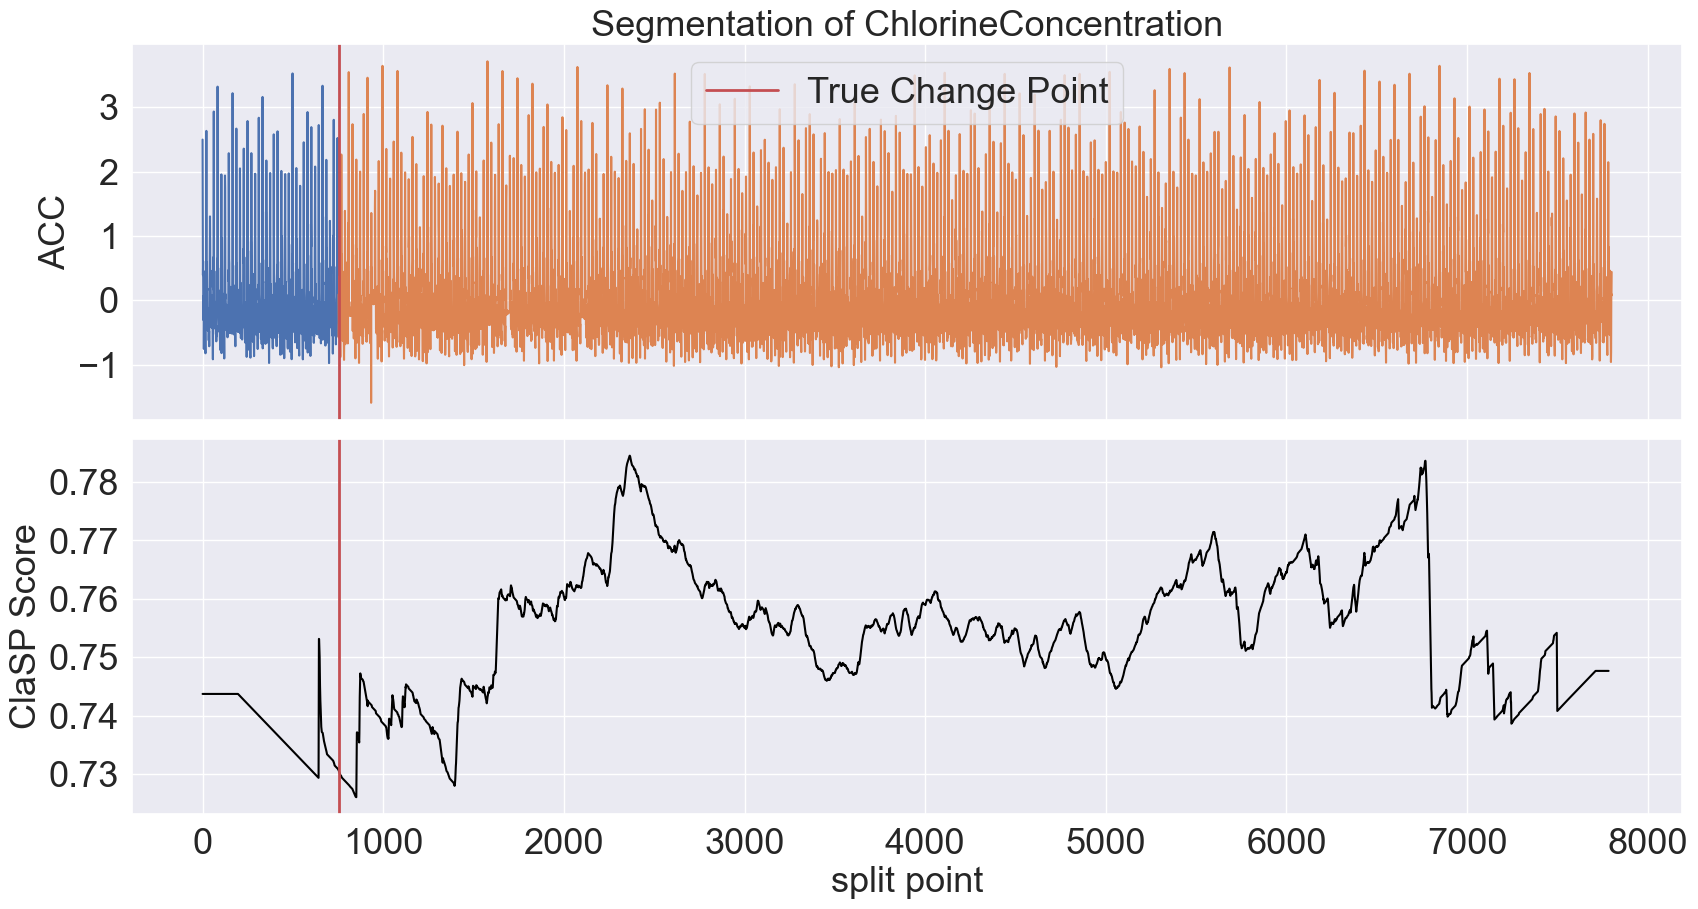

In [67]:
tssb = load_time_series_segmentation_datasets("Data/ChlorineConcentration_TRAIN.txt")
clasp = BinaryClaSPSegmentation()
for _, (ts_name, window_size, cps, ts) in tssb.iterrows():
    found_cps = clasp.fit_predict(ts)
    score = covering({0: cps}, found_cps, ts.shape[0])
    print(f"Time Series: {ts_name}: True Change Points: {cps}, Found Change Points: {found_cps.tolist()}, Score: {score}")
    clasp.plot(gt_cps=true_cps, heading=f"Segmentation of {ts_name}", ts_name="ACC", file_path="segmentation_example.png") 